# [CPSC 322](https://github.com/GonzagaCPSC322) Data Science Algorithms
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Discretization
What are our learning objectives for this lesson?
* Transform a continuous attribute into a categorical attribute using discretization

Content used in this lesson is based upon information in the following sources:
* Dr. Shawn Bowers' Data Mining notes

## Warm-up Task(s)
* Open JupyterNotebookFun/utils.py
    * Finish this task: create a box plot of MSRPs grouped by model year
* Read the "Discretization" and "Discretization Lab" sections below

## Today 
* Announcements
    * New in Zoom... live captioning!! Let's try it out
    * No RQ due on Monday
    * PA3 is due Thursday 2/25. Questions?
        * Note: related to one of the bonus tasks... there is an example of a "multiple frequency diagram" in `E Data Visualization.ipynb` on Github
* Finish JupyterNotebookFun
    * Discretization
    * Linear regression
* IQ3 last ~15 mins of class

## Discretization
Discretization is converting numeric (continuous) attributes to be discrete (categorical). Here are a few reasons you might apply discretization:
* To create frequency diagrams (e.g. histograms)
    * Recall we used `plt.hist(xs, bins=20)` to convert a list of numeric values into bins and plot the frequency of values in each bin

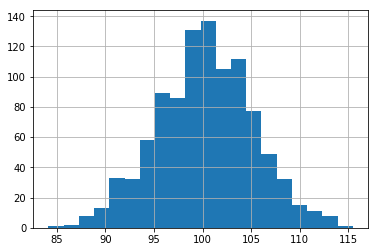

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
mu, sigma = 100, 5 # mean and standard deviation
xs = np.random.normal(mu, sigma, 1000)

plt.hist(xs, bins=20)
plt.grid(True)
plt.show()

* To look at relationships (e.g., to another discrete attribute)
* To remove "noise"
* To use with specific mining algorithms

### Some "Binning" Techniques
* Real, meaningful bins for the domain
     * e.g., US DOE fuel economy rating
     * The values that define bins are called "cut points"
     
Rating |MPG
-|-|
10 |≥ 45
9 |37–44
8 |31–36
7 |27–30
6 |24–26
5 |20–23
4 |17–19
3 |15–16
2 |14
1 |≤ 13

* Define equal-width intervals
    * Can artificially skew data (e.g., most values in one or two bins)
* Define equal-frequency intervals
     * Doesn't take into account the actual distribution
* Cluster analysis (clustering)
    * Partition values into similar groups
         * e.g., based on closeness of data points
* Classification-based approaches
     * Find cut points that create ranges with instances having the most number of the same classes as possible
     
### Equal-width Bins
Partition the values into disjoint consecutive subranges (bins)
* Each bin (or bucket) denotes a category (ordinal)
* The range of each bin is the width
* Note that for n bins, we assume there are N + 1 cutoff points (we will use this approach becuase numpy's [histogram()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html#numpy.histogram) function uses this approach)
    * Includes the min and max value as cutoffs
    * All but the last (righthand-most) bin is half-open. For example, if the cutoffs are \[1, 2, 3, 4\] then the first bin is \[1, 2) and the second \[2, 3). The last bin, however, is \[3, 4\]
* Alternatively we could assume other conventions, such as
    * N cutoffs
        * Includes max value (as last cutoff)
        * All bins are are half-open. For example, if the cutoffs are \[1, 2, 3, 4\] then the first bin is (-inf, 1\] and the second (1, 2\] and the third (2, 3\] and the last (3, 4\]
    * N - 1 cutoffs
        * Not include max as last cutoff
     
## Discretization Lab
1. Given a list of values and the number of equal-width bins to create (N), write a function to return a list of the N + 1 cutoff points.
1. Given a list of values and a list of N + 1 cutoff points, write a function to return the corresponding frequencies of the N bins.
1. Given a list of the N bins and the N frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by `plt.hist()`